In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing

Load dataset


In [ ]:

data = pd.read_csv('Binding Energy Analysis  - Au base SAA.csv')
data.head()

,Element,Atomic Number,Atomic Mass (u),Group,Period,Radius (pm),Electronegativity (Pauling),Melting Point (°C),Boiling Point (°C),Heat of Fusion (kJ/mol),Ionization Energy (kJ/mol),Surface Energy (J/m²),Density (g/cm³),d-band Center (eV),d-band Filling,Number of d Electrons,Wigner-Seitz Radius (pm),Eo (binding energy ),Ec (binding energy )
0,Sc,21,44.96,3,4,162,1.36,1541,2836,14.10,633.1,2.45,2.99,-1.9,0.82,1,162,-5.35,-4.75
1,Ti,22,47.87,4,4,147,1.54,1668,3287,14.15,658.8,2.84,4.50,-2.0,0.95,2,147,-6.37,-5.54
2,V,23,50.94,5,4,134,1.63,1910,3407,17.50,650.9,3.13,6.11,-2.3,1.05,3,134,-6.86,-6.29
3,Fe,26,55.85,8,4,126,1.83,1538,2862,13.80,762.5,2.45,7.87,-2.2,0.94,6,126,-4.59,-5.69
4,Co,27,58.93,9,4,125,1.88,1495,2927,16.20,760.4,2.50,8.86,-2.5,0.93,7,125,-4.57,-6.07


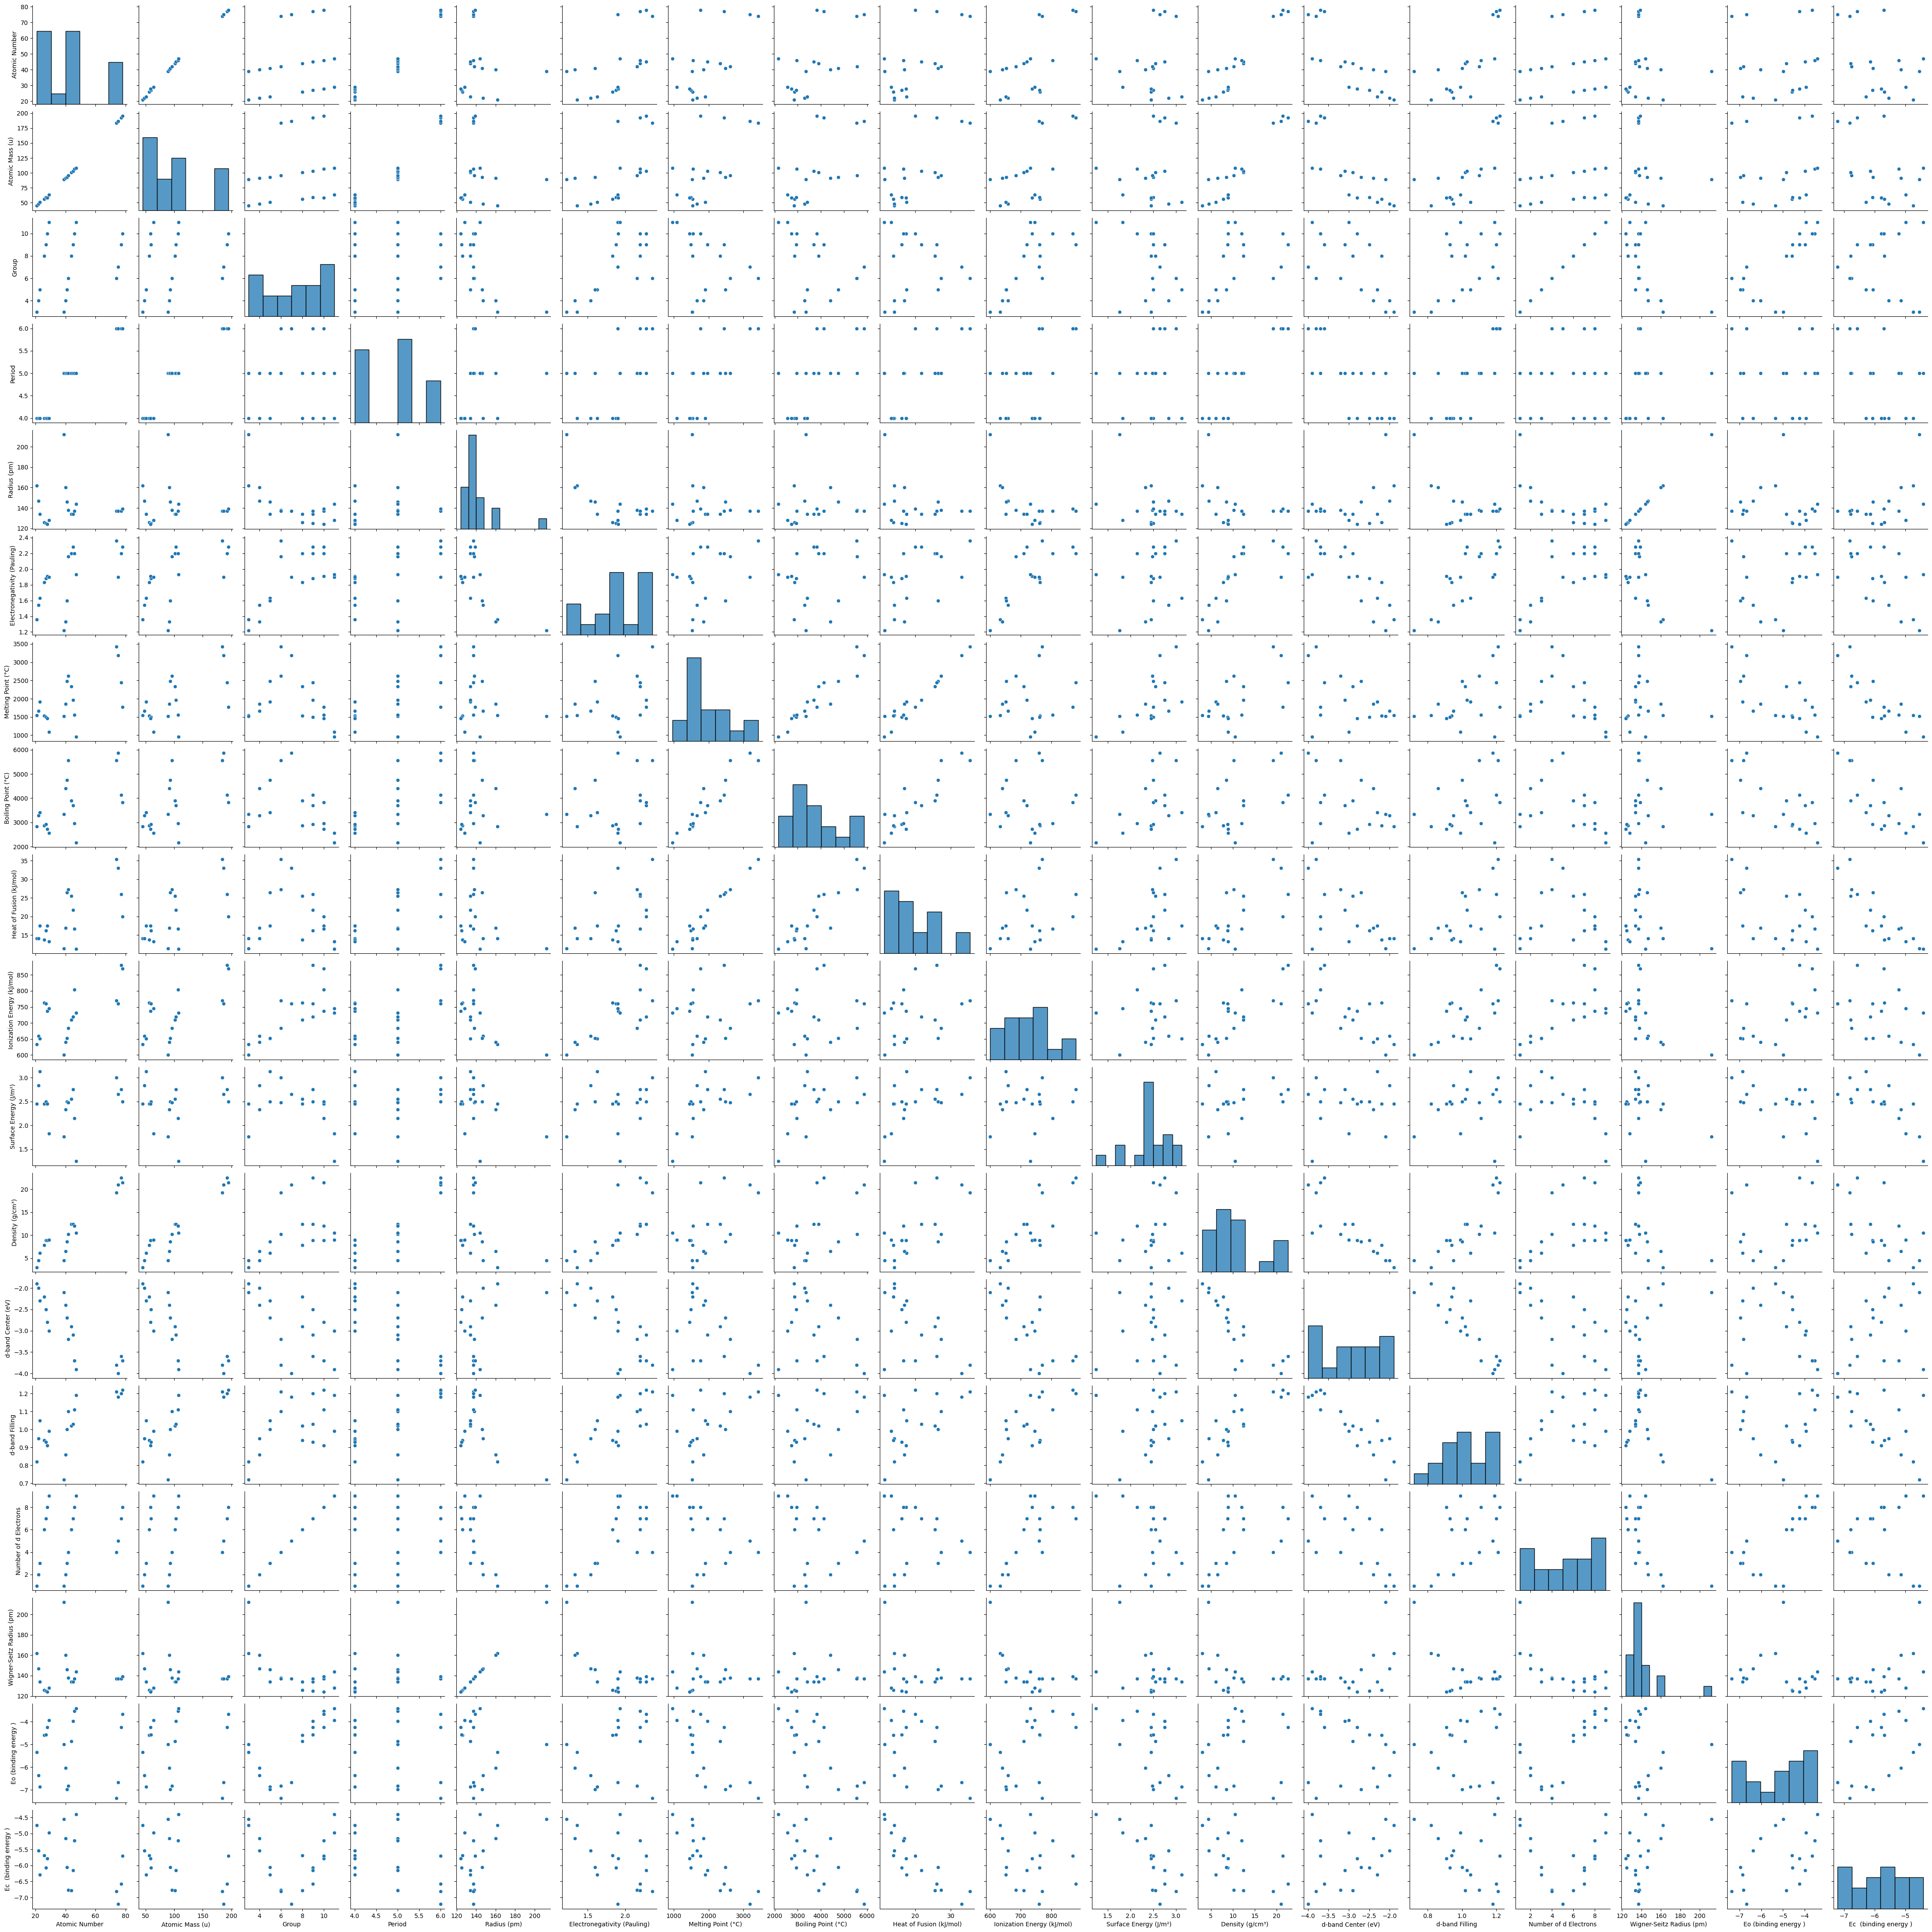

In [ ]:
sns.pairplot(data)


In [ ]:
dataCu = pd.read_csv('Binding Energy Analysis  - Cu based SAA.csv')
dataCu.head()

,Element,Atomic Number,Atomic Mass (u),Group,Period,Radius (pm),Electronegativity (Pauling),Melting Point (°C),Boiling Point (°C),Heat of Fusion (kJ/mol),Ionization Energy (kJ/mol),Surface Energy (J/m²),Density (g/cm³),d-band Center (eV),d-band Filling,Number of d Electrons,Wigner-Seitz Radius (pm),Eo (binding energy ),Ec (binding energy )
0,Sc,21,44.96,3,4,162,1.36,1541,2836,14.10,633.1,2.45,2.99,-1.9,0.82,1,162,-6.63,-5.99
1,Ti,22,47.87,4,4,147,1.54,1668,3287,14.15,658.8,2.84,4.50,-2.0,0.95,2,147,-6.99,-6.21
2,V,23,50.94,5,4,134,1.63,1910,3407,17.50,650.9,3.13,6.11,-2.3,1.05,3,134,-7.11,-6.82
3,Fe,26,55.85,8,4,126,1.83,1538,2862,13.80,762.5,2.45,7.87,-2.2,0.94,6,126,-5.86,-6.51
4,Co,27,58.93,9,4,125,1.88,1495,2927,16.20,760.4,2.50,8.86,-2.5,0.93,7,125,-5.79,-6.78


In [ ]:
dataAg = pd.read_csv('Binding Energy Analysis  - Ag base SAA.csv')
dataAg.head()

,Element,Atomic Number,Atomic Mass (u),Group,Period,Radius (pm),Electronegativity (Pauling),Melting Point (°C),Boiling Point (°C),Heat of Fusion (kJ/mol),Ionization Energy (kJ/mol),Surface Energy (J/m²),Density (g/cm³),d-band Center (eV),d-band Filling,Number of d Electrons,Wigner-Seitz Radius (pm),Eo (binding energy ),Ec (binding energy )
0,Sc,21,44.96,3,4,162,1.36,1541,2836,14.10,633.1,2.45,2.99,-1.9,0.82,1,162,-6.59,-4.86
1,Ti,22,47.87,4,4,147,1.54,1668,3287,14.15,658.8,2.84,4.50,-2.0,0.95,2,147,-7.14,-5.87
2,V,23,50.94,5,4,134,1.63,1910,3407,17.50,650.9,3.13,6.11,-2.3,1.05,3,134,-7.46,-6.69
3,Fe,26,55.85,8,4,126,1.83,1538,2862,13.80,762.5,2.45,7.87,-2.2,0.94,6,126,-5.51,-5.95
4,Co,27,58.93,9,4,125,1.88,1495,2927,16.20,760.4,2.50,8.86,-2.5,0.93,7,125,-5.27,-6.08


PLOTTING



In [ ]:
print(data.columns)

Index(['Element', 'Atomic Number', 'Atomic Mass (u)', 'Group', 'Period',
       'Radius (pm)', 'Electronegativity (Pauling)', 'Melting Point (°C)',
       'Boiling Point (°C)', 'Heat of Fusion (kJ/mol)',
       'Ionization Energy (kJ/mol)', 'Surface Energy (J/m²)',
       'Density (g/cm³)', 'd-band Center (eV)', 'd-band Filling',
       'Number of d Electrons', 'Wigner-Seitz Radius (pm)',
       'Eo (binding energy )', 'Ec  (binding energy )'],
      dtype='object')


PLOT OF BINDING ENERGY VS GROUP OF ELEMENTS


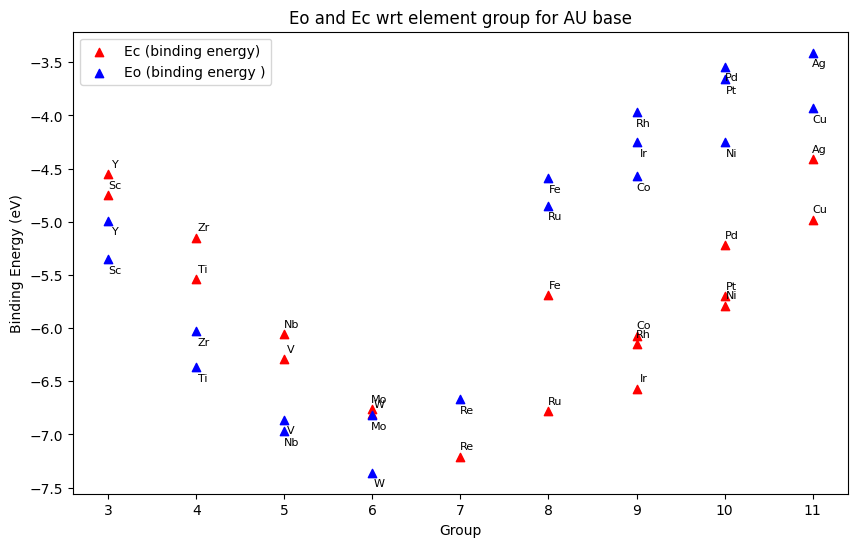

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for 'Ec (binding energy )' with triangle markers
scatter1 = ax.scatter(
    x=data['Group'],
    y=data['Ec  (binding energy )'],
    color='red',
    marker='^',  # Triangle marker
    label='Ec (binding energy)'
)

# Scatter plot for 'Eo (binding energy )' with triangle markers
scatter2 = ax.scatter(
    x=data['Group'],
    y=data['Eo (binding energy )'],
    color='blue',
    marker='^',  # Triangle marker
    label='Eo (binding energy )'
)

# Add labels to the points for 'Ec (binding energy )'
for i, element in enumerate(data['Element']):
    ax.annotate(
        element,
        (data['Group'][i], data['Ec  (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, 5),  # Offset the label slightly from the point
        ha='center',
        fontsize=8
    )

# Add labels for the points for 'Eo (binding energy )'
for i, element in enumerate(data['Element']):
    ax.annotate(
        element,
        (data['Group'][i], data['Eo (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, -10),  # Offset slightly differently
        ha='center',
        fontsize=8
    )

# Add labels, legend, and title
plt.xlabel("Group")
plt.ylabel("Binding Energy (eV)")
plt.title("Eo and Ec wrt element group for AU base")
plt.legend()
plt.show()

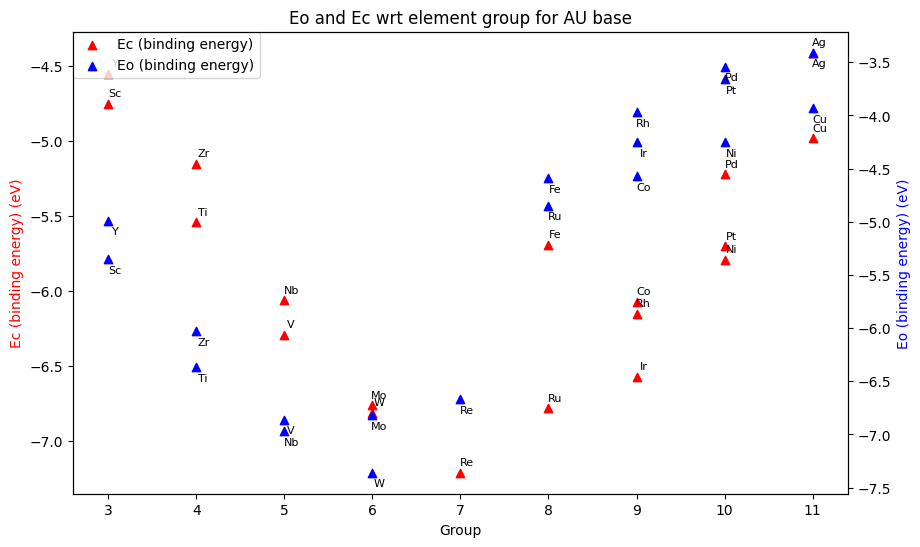

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for 'Ec (binding energy )' with triangle markers
scatter1 = ax1.scatter(
    x=data['Group'],
    y=data['Ec  (binding energy )'],
    color='red',
    marker='^',  # Triangle marker
    label='Ec (binding energy)'
)

# Create a second y-axis
ax2 = ax1.twinx()

# Scatter plot for 'Eo (binding energy )' with triangle markers on the second y-axis
scatter2 = ax2.scatter(
    x=data['Group'],
    y=data['Eo (binding energy )'],
    color='blue',
    marker='^',  # Triangle marker
    label='Eo (binding energy )'
)

# Add labels to the points for 'Ec (binding energy )'
for i, element in enumerate(data['Element']):
    ax1.annotate(
        element,
        (data['Group'][i], data['Ec  (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, 5),  # Offset the label slightly from the point
        ha='center',
        fontsize=8
    )

# Add labels for the points for 'Eo (binding energy )'
for i, element in enumerate(data['Element']):
    ax2.annotate(
        element,
        (data['Group'][i], data['Eo (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, -10),  # Offset slightly differently
        ha='center',
        fontsize=8
    )

# Set labels for both axes
ax1.set_xlabel("Group")
ax1.set_ylabel("Ec (binding energy) (eV)", color='red')
ax2.set_ylabel("Eo (binding energy) (eV)", color='blue')

# Add title
ax1.set_title("Eo and Ec wrt element group for AU base")

# Legends - place legend in the top left
ax1.legend(
    handles=[scatter1, scatter2],
    labels=['Ec (binding energy)', 'Eo (binding energy)'],
    loc='upper left',  # Positioning the legend in the top left
    borderaxespad=0.
)

plt.show()


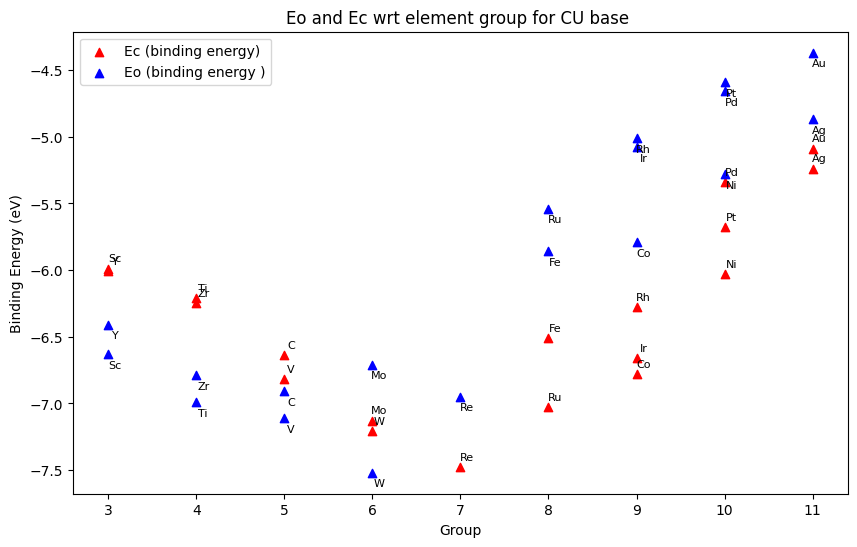

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for 'Ec (binding energy )' with triangle markers
scatter1 = ax.scatter(
    x=dataCu['Group'],
    y=dataCu['Ec  (binding energy )'],
    color='red',
    marker='^',  # Triangle marker
    label='Ec (binding energy)'
)

# Scatter plot for 'Eo (binding energy )' with triangle markers
scatter2 = ax.scatter(
    x=dataCu['Group'],
    y=dataCu['Eo (binding energy )'],
    color='blue',
    marker='^',  # Triangle marker
    label='Eo (binding energy )'
)

# Add labels to the points for 'Ec (binding energy )'
for i, element in enumerate(dataCu['Element']):
    ax.annotate(
        element,
        (dataCu['Group'][i], dataCu['Ec  (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, 5),  # Offset the label slightly from the point
        ha='center',
        fontsize=8
    )

# Add labels for the points for 'Eo (binding energy )'
for i, element in enumerate(dataCu['Element']):
    ax.annotate(
        element,
        (dataCu['Group'][i], dataCu['Eo (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, -10),  # Offset slightly differently
        ha='center',
        fontsize=8
    )

# Add labels, legend, and title
plt.xlabel("Group")
plt.ylabel("Binding Energy (eV)")
plt.title("Eo and Ec wrt element group for CU base ")
plt.legend()
plt.show()

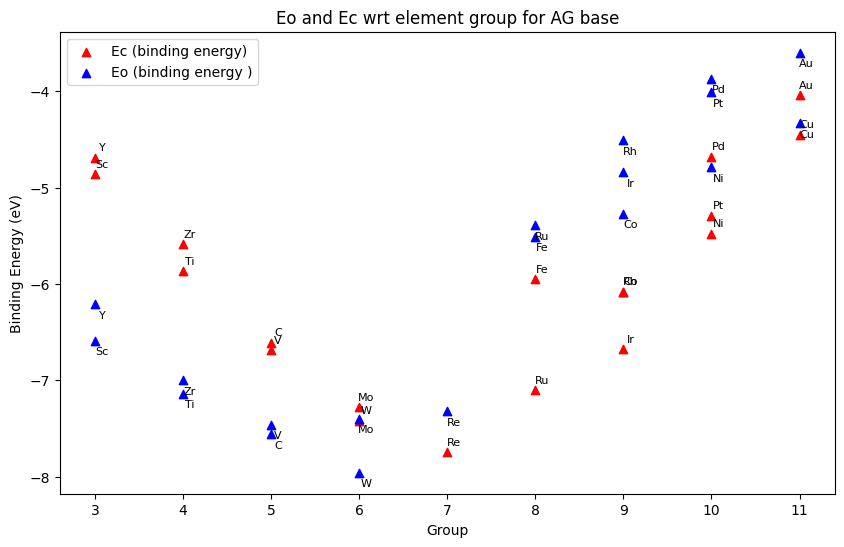

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for 'Ec (binding energy )' with triangle markers
scatter1 = ax.scatter(
    x=dataAg['Group'],
    y=dataAg['Ec  (binding energy )'],
    color='red',
    marker='^',  # Triangle marker
    label='Ec (binding energy)'
)

# Scatter plot for 'Eo (binding energy )' with triangle markers
scatter2 = ax.scatter(
    x=dataAg['Group'],
    y=dataAg['Eo (binding energy )'],
    color='blue',
    marker='^',  # Triangle marker
    label='Eo (binding energy )'
)

# Add labels to the points for 'Ec (binding energy )'
for i, element in enumerate(dataAg['Element']):
    ax.annotate(
        element,
        (dataAg['Group'][i], dataAg['Ec  (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, 5),  # Offset the label slightly from the point
        ha='center',
        fontsize=8
    )

# Add labels for the points for 'Eo (binding energy )'
for i, element in enumerate(dataAg['Element']):
    ax.annotate(
        element,
        (dataAg['Group'][i], dataAg['Eo (binding energy )'][i]),
        textcoords="offset points",
        xytext=(5, -10),  # Offset slightly differently
        ha='center',
        fontsize=8
    )

# Add labels, legend, and title
plt.xlabel("Group")
plt.ylabel("Binding Energy (eV)")
plt.title("Eo and Ec wrt element group for AG base")
plt.legend()
plt.show()

plotting correlation matrix for feature selection


for AU metal base

Dopant elements correlation


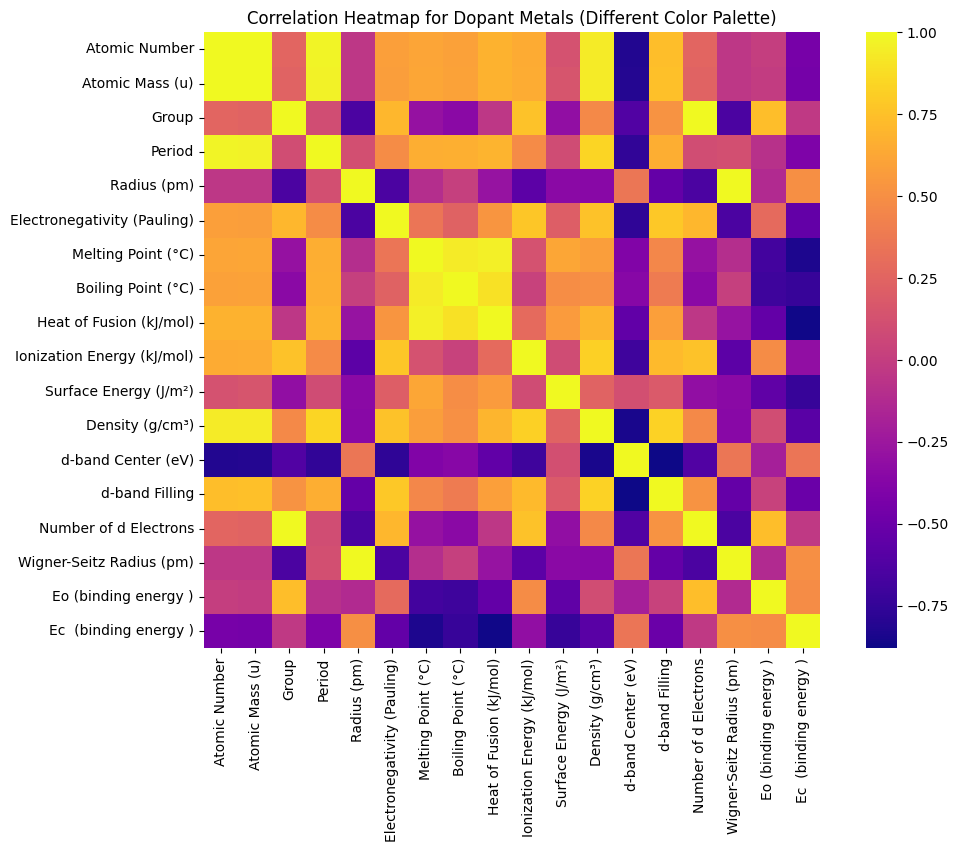

In [ ]:
dopant_metal_data = data.iloc[:, 1:]

# Compute the correlation matrix for dopant metal data
dopant_correlation_matrix = dopant_metal_data.corr()

# Plot the heatmap for dopant metals
plt.figure(figsize=(12, 8))
sns.heatmap(dopant_correlation_matrix, annot=False, fmt=".2f", cmap="plasma", cbar=True, square=True)
plt.title("Correlation Heatmap for Dopant Metals (Different Color Palette)")
plt.show()

cleaned data for removing Nan values


In [ ]:
data_cleaned = data.dropna()
data_cleaned


,Element,Atomic Number,Atomic Mass (u),Group,Period,Radius (pm),Electronegativity (Pauling),Melting Point (°C),Boiling Point (°C),Heat of Fusion (kJ/mol),Ionization Energy (kJ/mol),Surface Energy (J/m²),Density (g/cm³),d-band Center (eV),d-band Filling,Number of d Electrons,Wigner-Seitz Radius (pm),Eo (binding energy ),Ec (binding energy )
0,Sc,21,44.96,3,4,162,1.36,1541,2836,14.10,633.1,2.45,2.99,-1.9,0.82,1,162,-5.35,-4.75
1,Ti,22,47.87,4,4,147,1.54,1668,3287,14.15,658.8,2.84,4.50,-2.0,0.95,2,147,-6.37,-5.54
2,V,23,50.94,5,4,134,1.63,1910,3407,17.50,650.9,3.13,6.11,-2.3,1.05,3,134,-6.86,-6.29
3,Fe,26,55.85,8,4,126,1.83,1538,2862,13.80,762.5,2.45,7.87,-2.2,0.94,6,126,-4.59,-5.69
4,Co,27,58.93,9,4,125,1.88,1495,2927,16.20,760.4,2.50,8.86,-2.5,0.93,7,125,-4.57,-6.07
5,Ni,28,58.69,10,4,124,1.91,1455,2732,17.48,737.1,2.45,8.90,-2.8,0.91,8,124,-4.25,-5.79
6,Cu,29,63.55,11,4,128,1.90,1084,2562,13.26,745.5,1.83,8.96,-3.0,0.99,9,128,-3.93,-4.98
7,Y,39,88.91,3,5,212,1.22,1526,3345,11.40,600.0,1.76,4.47,-2.1,0.72,1,212,-4.99,-4.55
8,Zr,40,91.22,4,5,160,1.33,1855,4409,16.90,640.1,2.33,6.52,-2.4,0.86,2,160,-6.03,-5.15
9,Nb,41,92.91,5,5,146,1.60,2477,4744,26.40,652.1,2.50,8.57,-2.7,1.00,3,146,-6.97,-6.06


applying KNN


In [ ]:
data_cleaned.columns

Index(['Element', 'Atomic Number', 'Atomic Mass (u)', 'Group', 'Period',
       'Radius (pm)', 'Electronegativity (Pauling)', 'Melting Point (°C)',
       'Boiling Point (°C)', 'Heat of Fusion (kJ/mol)',
       'Ionization Energy (kJ/mol)', 'Surface Energy (J/m²)',
       'Density (g/cm³)', 'd-band Center (eV)', 'd-band Filling',
       'Number of d Electrons', 'Wigner-Seitz Radius (pm)',
       'Eo (binding energy )', 'Ec  (binding energy )'],
      dtype='object')

KNN for Eo(binding energy)


In [ ]:
X = data_cleaned.drop(columns=['Element', 'Ec  (binding energy )', 'Eo (binding energy )'])
y = data_cleaned['Eo (binding energy )']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test_scaled)
y_pred


array([-6.2125, -4.265 , -5.325 , -6.1125])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.35,-6.2125
1,-4.25,-4.2650
2,-4.85,-5.3250
3,-6.37,-6.1125


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.5089357768913485 eV


performing cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=4)
# Perform Cross-Validation only on Training Set
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")

# Convert negative MSE to positive
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)
print(f"Training CV MSE: {mse_mean:.4f}")
print(f"Training CV RMSE: {rmse_mean:.4f}")

Training CV MSE: 1.2947
Training CV RMSE: 1.1379


In [ ]:
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_test_pred = knn.predict(X_test_scaled)
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test,
    'Predicted (y_test_pred)': y_test_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_test_pred)
0,-5.35,-6.2125
1,-4.25,-4.2650
2,-4.85,-5.3250
3,-6.37,-6.1125


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Test Set Results
print(f"Test Set MSE: {mse_test:.4f}")
print(f"Test Set RMSE: {rmse_test:.4f}")
print(f"Test Set MAE: {mae_test:.4f}")
print(f"Test Set R² Score: {r2_test:.4f}")

Test Set MSE: 0.2590
Test Set RMSE: 0.5089
Test Set MAE: 0.4025
Test Set R² Score: 0.5712


for training data set

In [ ]:

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_train_scaled)
y_pred
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_train.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-6.03,-6.2125
1,-6.67,-6.2750
2,-4.59,-4.9875
3,-3.54,-3.7125
4,-7.36,-6.2750
5,-4.25,-5.4850
6,-6.86,-5.7475
7,-6.97,-6.6700
8,-3.66,-4.5300
9,-4.57,-4.2650


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.7290438944261175 eV


KNN for Ec(binding energy)


In [ ]:
X1 = data_cleaned.drop(columns=['Element', 'Ec  (binding energy )', 'Eo (binding energy )'])
y1 = data_cleaned['Ec  (binding energy )']


In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
cv_scores = cross_val_score(knn, X1_train_scaled, y1_train, cv=5, scoring="neg_mean_squared_error")
knn.fit(X1_train_scaled, y1_train)
rmse_cv = np.sqrt(-cv_scores.mean())

print(f"Training CV RMSE: {rmse_cv:.4f}")

Training CV RMSE: 0.6551


In [ ]:
y1_pred = knn.predict(X1_test_scaled)
y1_pred

array([-5.5125, -5.7225, -6.0475, -5.7975])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y1_test.values,
    'Predicted (y_pred)': y1_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-4.75,-5.5125
1,-5.79,-5.7225
2,-6.78,-6.0475
3,-5.54,-5.7975


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
print("Root Mean Square Error (RMSE):", rmse)


Root Mean Square Error (RMSE): 0.5451662590439732


for training

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X1_train_scaled, y1_train)
y1_pred = knn.predict(X1_train_scaled)
y1_pred
comparison_table = pd.DataFrame({
    'Actual (y_test)': y1_train.values,
    'Predicted (y_pred)': y1_pred
})
comparison_table.reset_index(drop=True)


,Actual (y_test),Predicted (y_pred)
0,-5.15,-5.5125
1,-7.21,-6.8375
2,-5.69,-5.7575
3,-5.22,-5.1900
4,-6.81,-6.8375
5,-6.57,-6.5725
6,-6.29,-6.0275
7,-6.06,-6.0650
8,-5.70,-6.1750
9,-6.07,-5.7225


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y1_train, y1_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.41173008958134993 eV


Applying SVR


slecting features and targets

In [ ]:
data_cleaned.columns

Index(['Element', 'Atomic Number', 'Atomic Mass (u)', 'Group', 'Period',
       'Radius (pm)', 'Electronegativity (Pauling)', 'Melting Point (°C)',
       'Boiling Point (°C)', 'Heat of Fusion (kJ/mol)',
       'Ionization Energy (kJ/mol)', 'Surface Energy (J/m²)',
       'Density (g/cm³)', 'd-band Center (eV)', 'd-band Filling',
       'Number of d Electrons', 'Wigner-Seitz Radius (pm)',
       'Eo (binding energy )', 'Ec  (binding energy )'],
      dtype='object')

for Eo (binding energy)

In [ ]:
features = data_cleaned.select_dtypes(include=['float64']).drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
target = data_cleaned['Eo (binding energy )']

spltting test train data


In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1000, epsilon=0.5, gamma=0.02)



In [ ]:
svr = SVR(kernel='rbf', C=1000, epsilon=0.5, gamma=0.02)
cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"SVR - Training CV MSE: {mse_mean:.4f}")
print(f"SVR - Training CV RMSE: {rmse_mean:.4f}")

SVR - Training CV MSE: 0.6612
SVR - Training CV RMSE: 0.8131


In [ ]:
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)  # Predict target values
y_pred


array([-6.00621169, -4.24272001, -5.26653878, -5.85890238])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.35,-6.006212
1,-4.25,-4.242720
2,-4.85,-5.266539
3,-6.37,-5.858902


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.4651322686022


In [ ]:
#employing grid search for better epsilon
from sklearn.model_selection import GridSearchCV
results = []
epsilon_values = np.logspace(-1, 1, 1000)

# Loop over epsilon values and evaluate each one
for epsilon in epsilon_values:
    svr = SVR(C=1.0, gamma='scale', epsilon=epsilon)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((epsilon, rmse))

# Find the epsilon with the minimum RMSE
best_epsilon, best_rmse = min(results, key=lambda x: x[1])

print("Optimal epsilon:", best_epsilon)
print("Minimum RMSE:", best_rmse)

Optimal epsilon: 0.45778405383766185
Minimum RMSE: 0.7043357010143368


training data


In [ ]:

y_pred = svr_model.predict(X_train_scaled)  # Predict target values
y_pred


array([-5.87421787, -6.81143913, -4.09000897, -3.49232368, -6.85948816,
       -4.75007288, -6.35991835, -7.01972599, -3.90097032, -4.10045989,
       -4.47048309, -5.49000992, -6.32045397, -3.90956783, -3.78161506])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_train.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-6.03,-5.874218
1,-6.67,-6.811439
2,-4.59,-4.090009
3,-3.54,-3.492324
4,-7.36,-6.859488
5,-4.25,-4.750073
6,-6.86,-6.359918
7,-6.97,-7.019726
8,-3.66,-3.900970
9,-4.57,-4.100460


In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.39579764958504543


for Ec (binding energy)

In [ ]:
features = data_cleaned.select_dtypes(include=['float64']).drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
target = data_cleaned['Ec  (binding energy )']

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1, gamma=0.02)


In [ ]:
cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"SVR - Training CV MSE: {mse_mean:.4f}")
print(f"SVR - Training CV RMSE: {rmse_mean:.4f}")

SVR - Training CV MSE: 0.7017
SVR - Training CV RMSE: 0.8376


In [ ]:
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)  # Predict target values
y_pred


array([-5.34192613, -5.98006214, -6.52248527, -5.77698131])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-4.75,-5.341926
1,-5.79,-5.980062
2,-6.78,-6.522485
3,-5.54,-5.776981


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.3567121152515274


for training set

In [ ]:
y_pred = svr_model.predict(X_train_scaled)  # Predict target values
y_pred

array([-5.08967841, -7.10994391, -5.79026257, -5.32035315, -6.90961776,
       -6.46961377, -6.18997167, -6.16041229, -5.79977173, -5.96980872,
       -6.24991656, -4.44972487, -6.65966235, -4.31035685, -5.08057513])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_train.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.15,-5.089678
1,-7.21,-7.109944
2,-5.69,-5.790263
3,-5.22,-5.320353
4,-6.81,-6.909618
5,-6.57,-6.469614
6,-6.29,-6.189972
7,-6.06,-6.160412
8,-5.70,-5.799772
9,-6.07,-5.969809


In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.09798146477983322


APPLYING TREE ENSEMBLE MODELS


Applying Random Forest Regression

For Eo(binding energy)

In [ ]:

X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Eo (binding energy )','Ec  (binding energy )'])
y = data_cleaned['Eo (binding energy )']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Random Forest - Training CV MSE: {mse_mean:.4f}")
print(f"Random Forest - Training CV RMSE: {rmse_mean:.4f}")


Random Forest - Training CV MSE: 0.5290
Random Forest - Training CV RMSE: 0.7274


In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.35,-5.57694
1,-4.25,-4.10412
2,-4.85,-4.84334
3,-6.37,-5.84366


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.0874652223000039


Analysing Feature Importance

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                         Feature  Importance
14        Number of d Electrons    0.286804
2                         Group    0.278844
7            Boiling Point (°C)    0.170694
6            Melting Point (°C)    0.089119
8       Heat of Fusion (kJ/mol)    0.037206
9    Ionization Energy (kJ/mol)    0.032567
12           d-band Center (eV)    0.021801
5   Electronegativity (Pauling)    0.016062
4                   Radius (pm)    0.015149
10        Surface Energy (J/m²)    0.014025
15     Wigner-Seitz Radius (pm)    0.010525
11              Density (g/cm³)    0.009177
13               d-band Filling    0.007243
0                 Atomic Number    0.006229
1               Atomic Mass (u)    0.003509
3                        Period    0.001045


For Ec(binding energy)

In [ ]:

X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Eo (binding energy )','Ec  (binding energy )'])
y = data_cleaned['Ec  (binding energy )']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Random Forest - Training CV MSE: {mse_mean:.4f}")
print(f"Random Forest - Training CV RMSE: {rmse_mean:.4f}")


Random Forest - Training CV MSE: 0.2757
Random Forest - Training CV RMSE: 0.5251


In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-4.75,-5.780653
1,-5.79,-5.774128
2,-6.78,-6.245660
3,-5.54,-5.919480


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.37300562732847264


In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)



Feature Importances:
                         Feature  Importance
10        Surface Energy (J/m²)    0.492041
6            Melting Point (°C)    0.189688
8       Heat of Fusion (kJ/mol)    0.114011
7            Boiling Point (°C)    0.045160
12           d-band Center (eV)    0.027440
14        Number of d Electrons    0.020845
9    Ionization Energy (kJ/mol)    0.018055
2                         Group    0.016015
4                   Radius (pm)    0.014880
13               d-band Filling    0.014819
15     Wigner-Seitz Radius (pm)    0.011775
1               Atomic Mass (u)    0.010423
0                 Atomic Number    0.007460
5   Electronegativity (Pauling)    0.007003
11              Density (g/cm³)    0.006073
3                        Period    0.004313


Applying ETR


for Eo(binding energy)

In [ ]:
data_cleaned = data.dropna(subset=['Eo (binding energy )', 'Ec  (binding energy )']).copy()


In [ ]:
if 'Element' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['Element'])

In [ ]:
X = data_cleaned.drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
y = data_cleaned['Eo (binding energy )']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=500, max_depth=5, random_state=42)



In [ ]:
cv_scores = cross_val_score(etr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Extra Trees - Training CV MSE: {mse_mean:.4f}")
print(f"Extra Trees - Training CV RMSE: {rmse_mean:.4f}")


Extra Trees - Training CV MSE: 0.3076
Extra Trees - Training CV RMSE: 0.5546


In [ ]:
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
y_pred

array([-5.30417   , -4.10344333, -4.99138167, -5.89602867])

In [ ]:

comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.35,-5.304170
1,-4.25,-4.103443
2,-4.85,-4.991382
3,-6.37,-5.896029


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.06705421148391955


In [ ]:
feature_importances = etr.feature_importances_
important_features = dict(zip(X.columns, feature_importances))

In [ ]:
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Number of d Electrons: 0.3188
Group: 0.2958
Boiling Point (°C): 0.1236
Melting Point (°C): 0.0644
Heat of Fusion (kJ/mol): 0.0464
Ionization Energy (kJ/mol): 0.0279
Electronegativity (Pauling): 0.0244
d-band Center (eV): 0.0226
d-band Filling: 0.0195
Surface Energy (J/m²): 0.0187
Radius (pm): 0.0120
Wigner-Seitz Radius (pm): 0.0106
Density (g/cm³): 0.0056
Atomic Number: 0.0041
Atomic Mass (u): 0.0037
Period: 0.0020


for Ec  (binding energy )

In [ ]:
X = data_cleaned.drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
y = data_cleaned['Ec  (binding energy )']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=500, max_depth=5, random_state=42)



In [ ]:
cv_scores = cross_val_score(etr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Extra Trees - Training CV MSE: {mse_mean:.4f}")
print(f"Extra Trees - Training CV RMSE: {rmse_mean:.4f}")


Extra Trees - Training CV MSE: 0.2074
Extra Trees - Training CV RMSE: 0.4554


In [ ]:
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
y_pred

array([-5.51912233, -5.81483733, -6.28462167, -5.820183  ])

In [ ]:

comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-4.75,-5.519122
1,-5.79,-5.814837
2,-6.78,-6.284622
3,-5.54,-5.820183


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.2290170658460946


In [ ]:
feature_importances = etr.feature_importances_
important_features = dict(zip(X.columns, feature_importances))
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Surface Energy (J/m²): 0.3262
Heat of Fusion (kJ/mol): 0.2723
Melting Point (°C): 0.1859
Boiling Point (°C): 0.0646
d-band Filling: 0.0194
Wigner-Seitz Radius (pm): 0.0181
Electronegativity (Pauling): 0.0179
Radius (pm): 0.0150
Group: 0.0143
Number of d Electrons: 0.0120
Atomic Mass (u): 0.0119
Period: 0.0103
Atomic Number: 0.0100
Ionization Energy (kJ/mol): 0.0090
d-band Center (eV): 0.0074
Density (g/cm³): 0.0056


Applying GBR


Eo  (binding energy )

In [ ]:
X = data_cleaned.drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
y = data_cleaned['Eo (binding energy )']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3, random_state=42)


In [ ]:
cv_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Gradient Boosting - Training CV MSE: {mse_mean:.4f}")
print(f"Gradient Boosting - Training CV RMSE: {rmse_mean:.4f}")

Gradient Boosting - Training CV MSE: 0.5256
Gradient Boosting - Training CV RMSE: 0.7250


In [ ]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
y_pred


array([-5.33223525, -4.08089233, -4.24733997, -6.06374277])

In [ ]:

comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-5.35,-5.332235
1,-4.25,-4.080892
2,-4.85,-4.247340
3,-6.37,-6.063743


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.12147639884270933


In [ ]:
feature_importances = gbr.feature_importances_
important_features = dict(zip(X.columns, feature_importances))
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Number of d Electrons: 0.5368
Group: 0.3172
Heat of Fusion (kJ/mol): 0.0593
Electronegativity (Pauling): 0.0280
Melting Point (°C): 0.0164
Ionization Energy (kJ/mol): 0.0151
Atomic Mass (u): 0.0103
d-band Filling: 0.0049
Surface Energy (J/m²): 0.0043
Atomic Number: 0.0031
d-band Center (eV): 0.0019
Boiling Point (°C): 0.0017
Wigner-Seitz Radius (pm): 0.0004
Density (g/cm³): 0.0002
Period: 0.0002
Radius (pm): 0.0001


Ec  (binding energy )

In [ ]:
X = data_cleaned.drop(columns=['Eo (binding energy )', 'Ec  (binding energy )'])
y = data_cleaned['Ec  (binding energy )']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3, random_state=42)


In [ ]:
cv_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mse_mean = -cv_scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Gradient Boosting - Training CV MSE: {mse_mean:.4f}")
print(f"Gradient Boosting - Training CV RMSE: {rmse_mean:.4f}")

Gradient Boosting - Training CV MSE: 0.2297
Gradient Boosting - Training CV RMSE: 0.4793


In [ ]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
y_pred

array([-5.66376754, -5.48191664, -6.01936495, -6.05548705])

In [ ]:

comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred,
    'Difference': y_test.values - y_pred,
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred),Difference
0,-4.75,-5.663768,0.913768
1,-5.79,-5.481917,-0.308083
2,-6.78,-6.019365,-0.760635
3,-5.54,-6.055487,0.515487


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.4435447648159898


In [ ]:
feature_importances = gbr.feature_importances_
important_features = dict(zip(X.columns, feature_importances))
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Surface Energy (J/m²): 0.7221
Boiling Point (°C): 0.1157
Heat of Fusion (kJ/mol): 0.0706
Melting Point (°C): 0.0365
d-band Filling: 0.0190
Group: 0.0087
Ionization Energy (kJ/mol): 0.0071
d-band Center (eV): 0.0070
Density (g/cm³): 0.0047
Atomic Mass (u): 0.0046
Atomic Number: 0.0023
Number of d Electrons: 0.0014
Radius (pm): 0.0001
Electronegativity (Pauling): 0.0000
Period: 0.0000
Wigner-Seitz Radius (pm): 0.0000


ANN


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
target_column = "Eo (binding energy )"
features = data.drop(columns=["Element", target_column, "Ec  (binding energy )"], errors='ignore')  # Drop unnecessary columns
target = data[target_column]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),                             # Hidden layer
    Dense(1)                                                  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 25.3301 - val_loss: 12.7043
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 13.6504 - val_loss: 7.7542
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 8.5183 - val_loss: 4.9986
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 5.9144 - val_loss: 3.7198
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 4.3285 - val_loss: 3.0722
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3.2604 - val_loss: 2.6589
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2.5383 - val_loss: 2.4260
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.0434 - val_loss: 2.2825
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.6980 - val_loss: 2.1769
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 1.4375 - val_loss: 2.0774
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1.2360 - val_loss: 1.9773
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 1.0747 - val_loss:

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[-6.1886024],
       [-4.9068766],
       [-3.7431667],
       [-6.336253 ]], dtype=float32)

In [ ]:

y_pred = y_pred.flatten()

# Create the comparison table
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})

# Reset index if needed
comparison_table.reset_index(drop=True, inplace=True)

# Display the table
print(comparison_table)

   Actual (y_test)  Predicted (y_pred)
0            -5.35           -6.188602
1            -4.25           -4.906877
2            -4.85           -3.743167
3            -6.37           -6.336253


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.590239930272568


For Ec (binding enegy)

In [ ]:
target_column = "Ec  (binding energy )"
features = data.drop(columns=["Element", target_column, "Eo (binding energy )"], errors='ignore')  # Drop unnecessary columns
target = data[target_column]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),                             # Hidden layer
    Dense(1)                                                  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 36.2354 - val_loss: 22.4111
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 23.4408 - val_loss: 16.5807
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 15.6155 - val_loss: 11.8560
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.2447 - val_loss: 8.4974
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 7.5506 - val_loss: 6.5314
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 5.8785 - val_loss: 5.2587
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 4.4393 - val_loss: 4.3069
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3.2105 - val_loss: 3.7283
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2.2905 - val_loss: 3.4030
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.6521 - val_loss: 3.2430
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.2273 - val_loss: 3.1644
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9566 - val_los

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[-5.0848627],
       [-6.8590536],
       [-4.6140323],
       [-5.2481365]], dtype=float32)

In [ ]:
y_pred = y_pred.flatten()

# Create the comparison table
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})

# Reset index if needed
comparison_table.reset_index(drop=True, inplace=True)

# Display the table
print(comparison_table)

   Actual (y_test)  Predicted (y_pred)
0            -4.75           -5.084863
1            -5.79           -6.859054
2            -6.78           -4.614032
3            -5.54           -5.248137


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.5079022908108828


Analysing algoritms

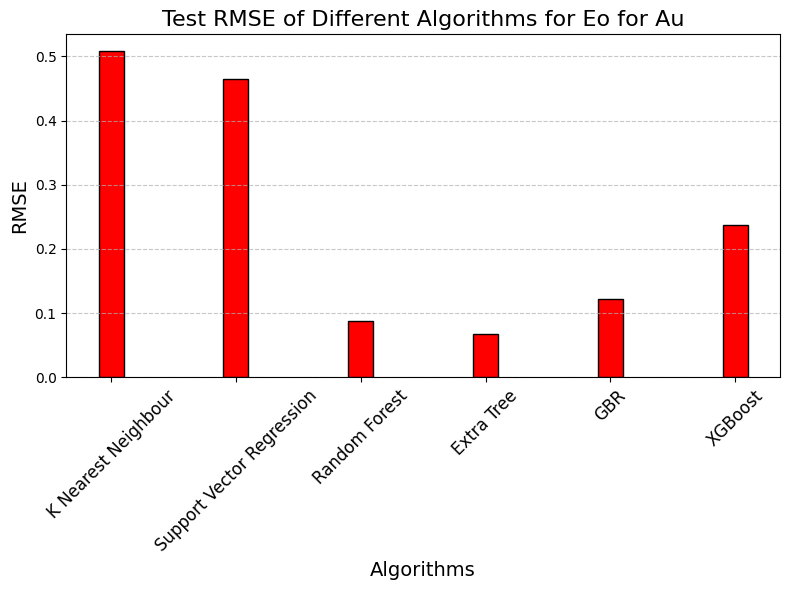

In [ ]:
import matplotlib.pyplot as plt

algorithm_rmse = {
    "K Nearest Neighbour": 0.5089357768913485,
    "Support Vector Regression": 0.4651322686022,
    "Random Forest": 0.0874652223000039,
    "Extra Tree": 0.06705421148391955,
    "GBR": 0.12147639884270933,
    "XGBoost": 0.23794427626453027,

}

# Extract algorithm names and RMSE values
algorithms = list(algorithm_rmse.keys())
rmse_values = list(algorithm_rmse.values())

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(algorithms, rmse_values, color='red', edgecolor='black', width=0.2)  # Adjust the width here
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Test RMSE of Different Algorithms for Eo for Au', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


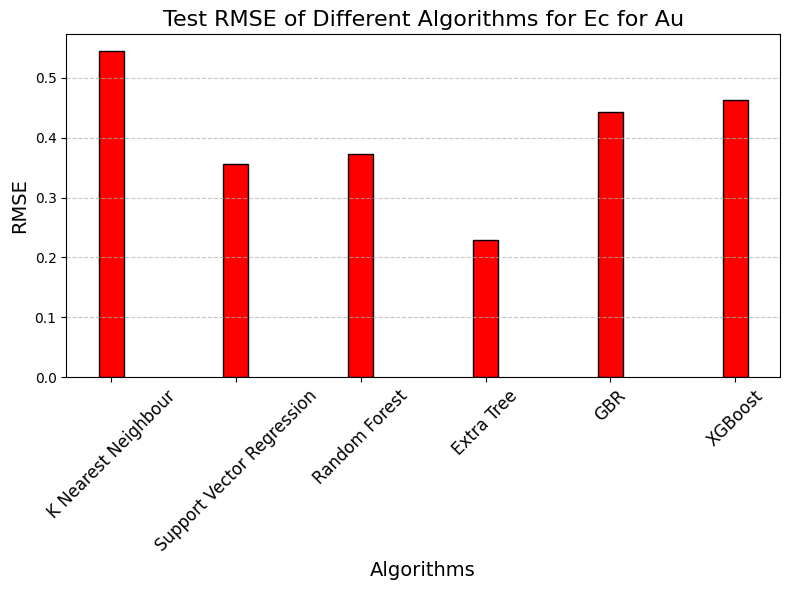

In [ ]:
import matplotlib.pyplot as plt

algorithm_rmse = {
    "K Nearest Neighbour":  0.5451662590439732,
    "Support Vector Regression": 0.3567121152515274,
    "Random Forest": 0.37300562732847264,
    "Extra Tree": 0.2290170658460946,
    "GBR": 0.4435447648159898,
    "XGBoost":  0.4625497192818289,

}

# Extract algorithm names and RMSE values
algorithms = list(algorithm_rmse.keys())
rmse_values = list(algorithm_rmse.values())

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(algorithms, rmse_values, color='red', edgecolor='black', width=0.2)  # Adjust the width here
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Test RMSE of Different Algorithms for Ec for Au', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
